# Clasterization

---
Author: Anatoliy Durkin

Updated: 25.04.2025

---
В ноутбуке рассмотрены методы кластеризации

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

Что такое кластеризация?

Чем кластеризация отличается от классификации?

Для каких задач используется кластеризация?

In [3]:
from sklearn.datasets import make_blobs

Text(0.5, 1.0, 'Данные для кластеризации')

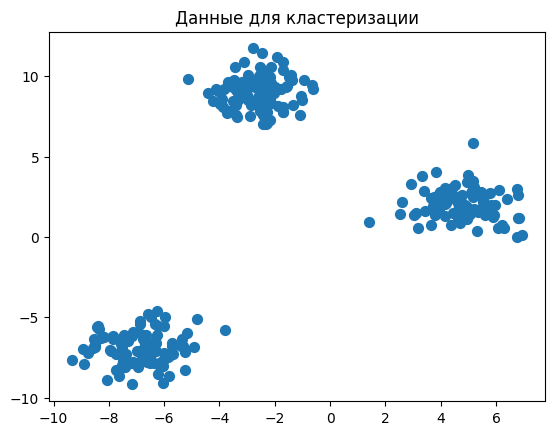

In [4]:
# Генерируем синтетические данные
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Данные для кластеризации")

## K-Means

In [5]:
peng = pd.read_csv('penguins.csv')

In [6]:
peng = peng[peng['sex']!='.']
peng = peng[(peng['flipper_length_mm']<1000) & (peng['flipper_length_mm']>100)]
peng = peng.dropna().reset_index(drop=True)
peng = pd.get_dummies(peng, drop_first=True)

In [7]:
peng.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(peng)

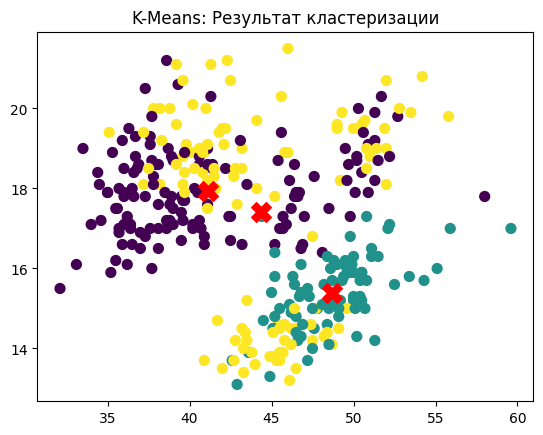

In [10]:
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("K-Means: Результат кластеризации")
plt.show()

In [11]:
peng2 = peng.copy()
peng2['cl'] = clusters

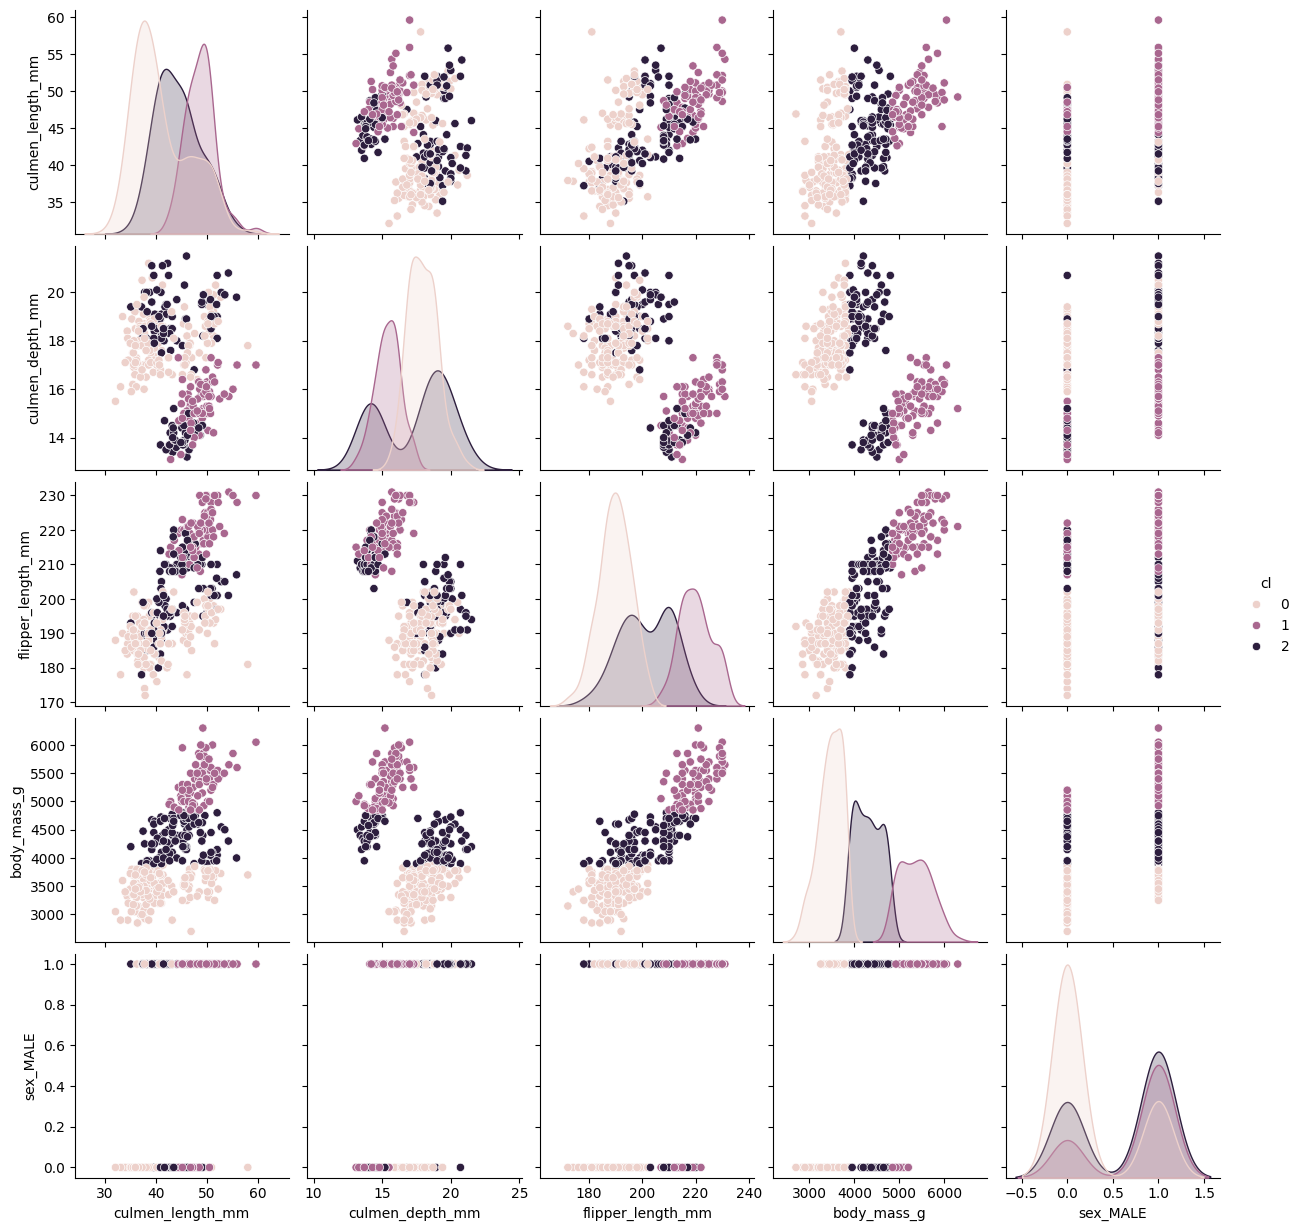

In [12]:
sns.pairplot(peng2, hue='cl')

In [13]:
scaler = StandardScaler()
peng = pd.DataFrame(scaler.fit_transform(peng), columns=peng.columns)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(peng)

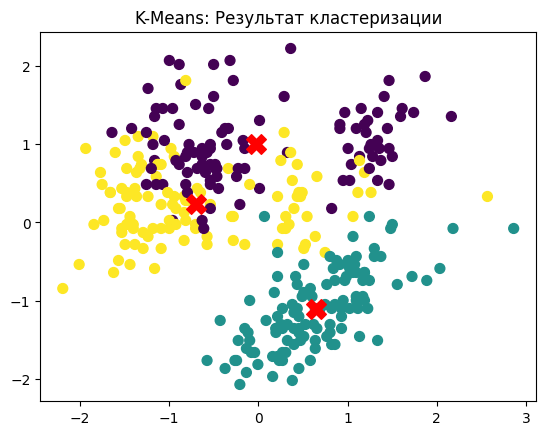

In [15]:
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("K-Means: Результат кластеризации")
plt.show()

In [16]:
peng2 = peng.copy()
peng2['cl'] = clusters

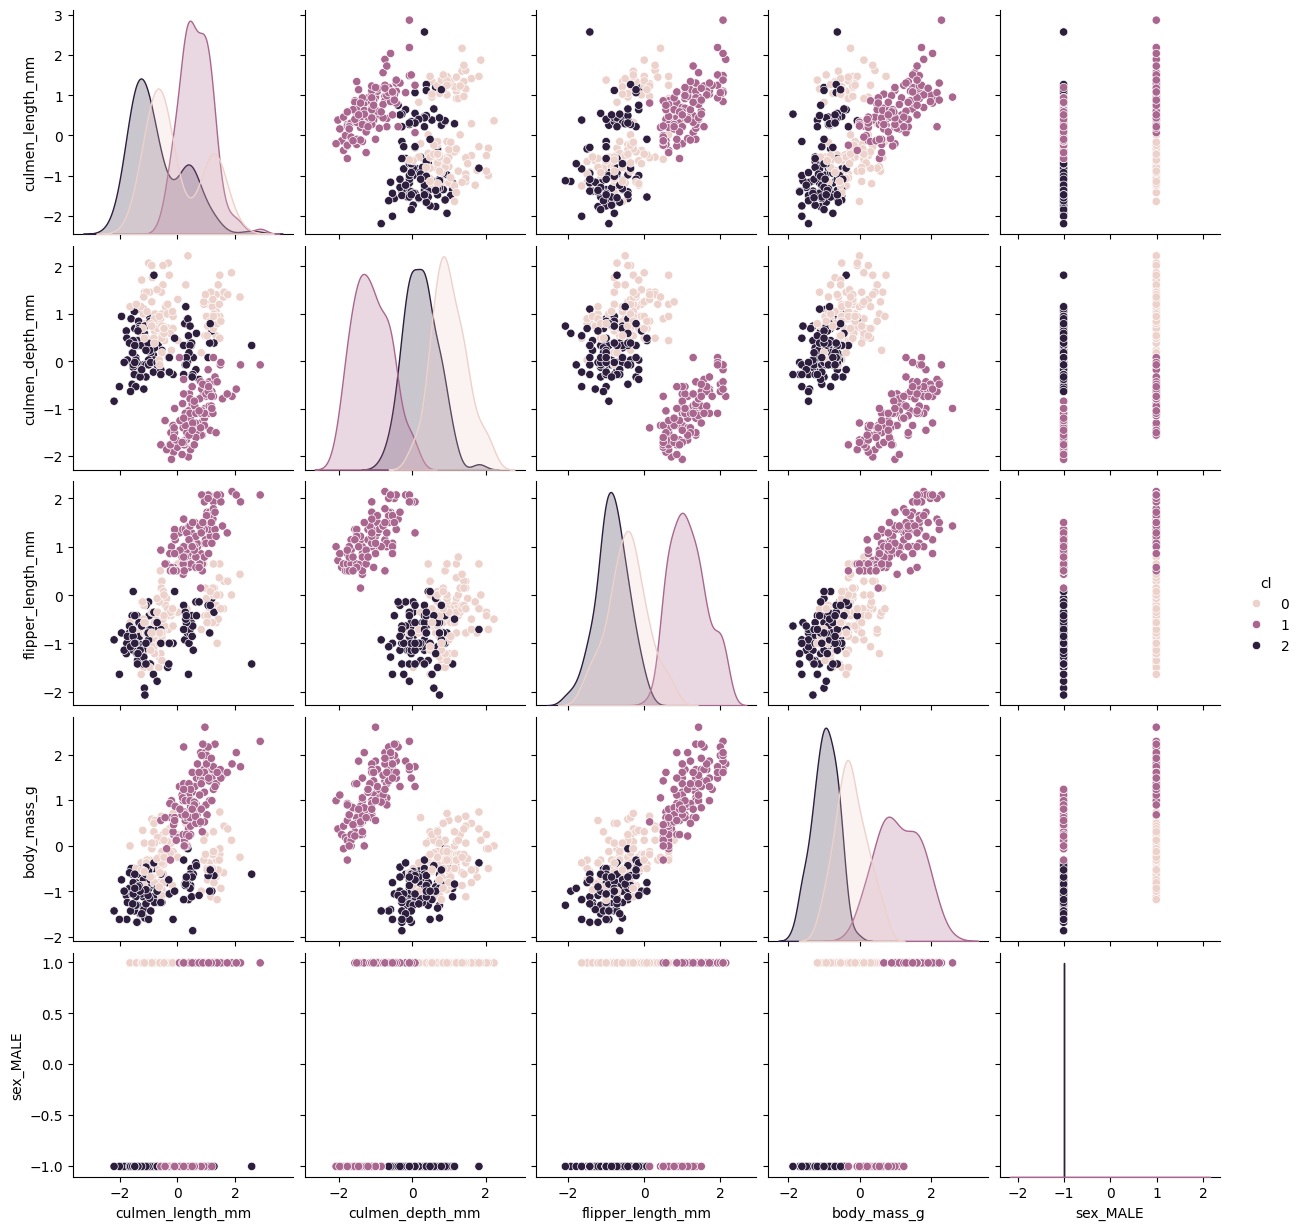

In [17]:
sns.pairplot(peng2, hue='cl')

Что не так с кластеризацией в этот раз? Как это можно исправить? Попробуйте внести изменения,чтобы кластеризация сработала лучше.

Проверка данных penguins после обработки:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.903906         0.790360          -1.425342    -0.566948  0.993994
1         -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2         -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3         -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4         -0.867170         1.761074          -0.783164    -0.691149  0.993994


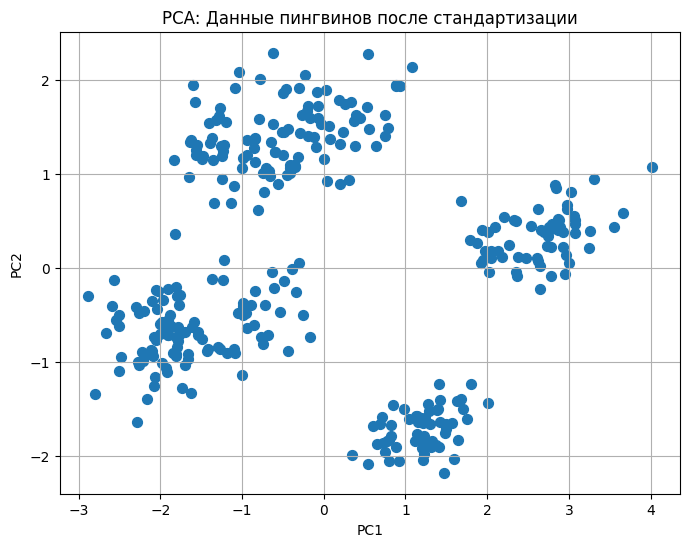

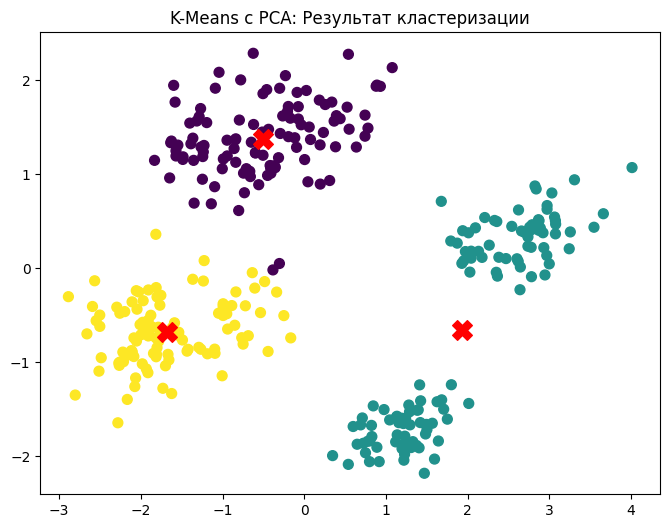

In [18]:
print("Проверка данных penguins после обработки:")
print(peng.head())

# Применение PCA для снижения размерности
pca = PCA(n_components=2)
peng_pca = pca.fit_transform(peng)

# Визуализация данных в пространстве главных компонент
plt.figure(figsize=(8, 6))
plt.scatter(peng_pca[:, 0], peng_pca[:, 1], s=50)
plt.title("PCA: Данные пингвинов после стандартизации")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Кластеризация на основе PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(peng_pca)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(peng_pca[:, 0], peng_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("K-Means с PCA: Результат кластеризации")
plt.show()

### Метод локтя

Так же, как и для выбора оптимального числа компонент при снижении размерности, есть метод локтя для определения оптимального числа кластеров алгоритма KMeans.

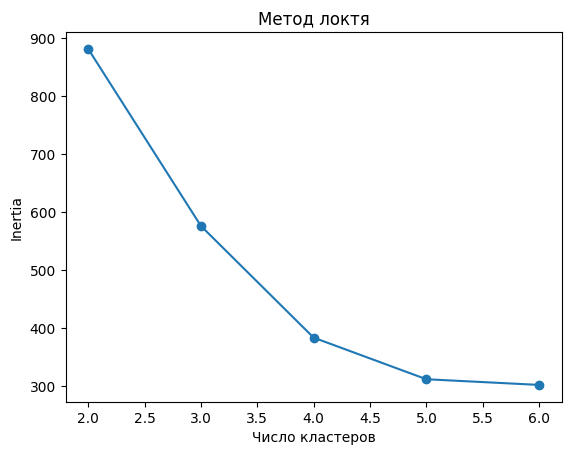

In [19]:
inertia = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(peng)
    inertia.append(kmeans.inertia_)  # Сумма квадратов расстояний до центроидов

plt.plot(range(2, 7), inertia, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя")
plt.show()

Почему `inertia` уменьшается с числом кластеров?

Выбирать стоит число кластеров, где происходит излом, если он резкий. Если он мягкий, то стоит выбирать из близких значений.

Метрики:
- `silhouette_score`: оценка компактности и разделимости кластеров.
- `adjusted_rand_score`: сравнение с истинными метками (если есть).

In [20]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [21]:
score_kmeans = silhouette_score(peng, clusters)
print(f"Silhouette Score (K-Means): {score_kmeans:.2f}")

Silhouette Score (K-Means): 0.45


Эту метрику также удобно использовать для выбора количества кластеров, но тут нужно брать число кластеров с максимальным значением метрики.

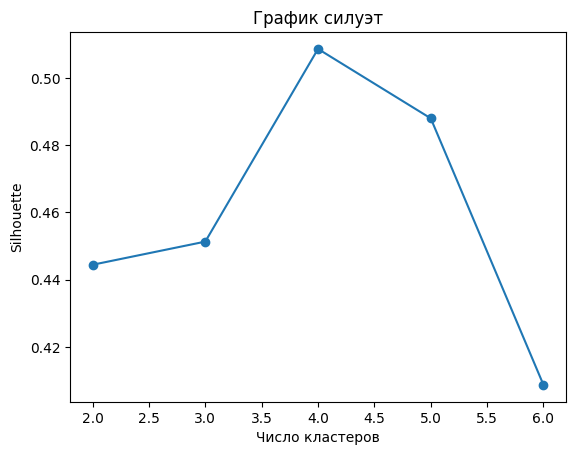

In [22]:
silhouette = []
for k in range(2, 7):
    clusters = KMeans(n_clusters=k, random_state=42).fit_predict(peng)
    silhouette.append(silhouette_score(peng, clusters))

plt.plot(range(2, 7), silhouette, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette")
plt.title("График силуэт")
plt.show()

Загрузим еще один датасет с данными по клиентам.

In [23]:
cust = pd.read_csv('customer_segmentation.csv')

In [24]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
cust = cust.drop(['Dt_Customer'], axis=1)
cust['Education'] = LabelEncoder().fit_transform(cust['Education'])
cust['Marital_Status'] = LabelEncoder().fit_transform(cust['Marital_Status'])

cust = pd.DataFrame(StandardScaler().fit_transform(cust), columns=cust.columns).dropna()

In [26]:
cust

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,-0.350141,0.251004,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,...,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,-0.350141,0.251004,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,-0.350141,1.180340,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,...,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,-0.350141,1.180340,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,...,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,1.428354,-0.678332,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,-0.350141,-0.678332,0.356642,-0.825218,0.906934,-0.107383,1.203678,0.419916,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2236,-0.490200,-1.903435,1.428354,1.180340,0.467539,2.890335,0.906934,0.237969,0.303291,-0.661449,...,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612
2237,0.516905,1.017761,-0.350141,-1.607669,0.188091,-0.825218,-0.929894,1.446700,1.795020,0.545656,...,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2238,0.814199,-1.068807,0.539106,1.180340,0.675388,-0.825218,0.906934,-1.419719,0.368666,0.092992,...,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


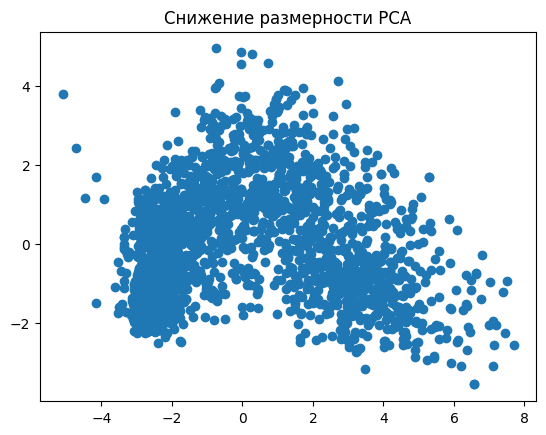

In [27]:
cust_pca = PCA(n_components=2).fit_transform(cust)

plt.scatter(cust_pca[:, 0], cust_pca[:, 1])
plt.title("Снижение размерности PCA")
plt.show()

Воспользуйтесь методом локтя,чтобы определить, на сколько кластеров можно раделить эти данные. Также можно построить график силуэт.

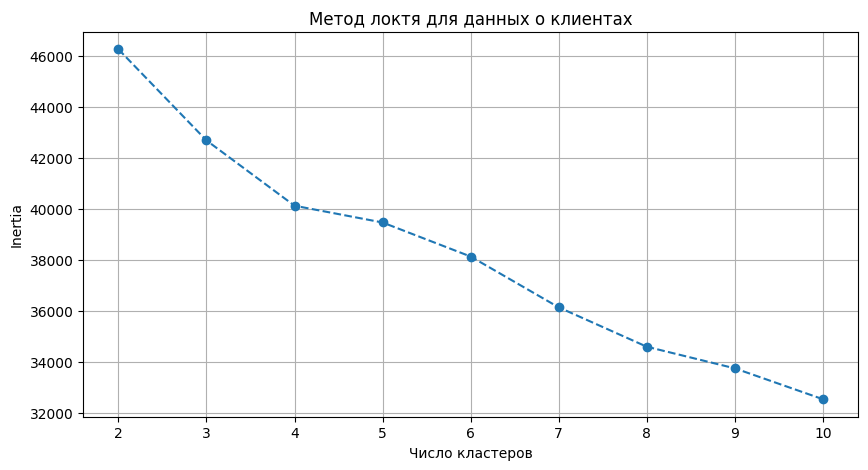

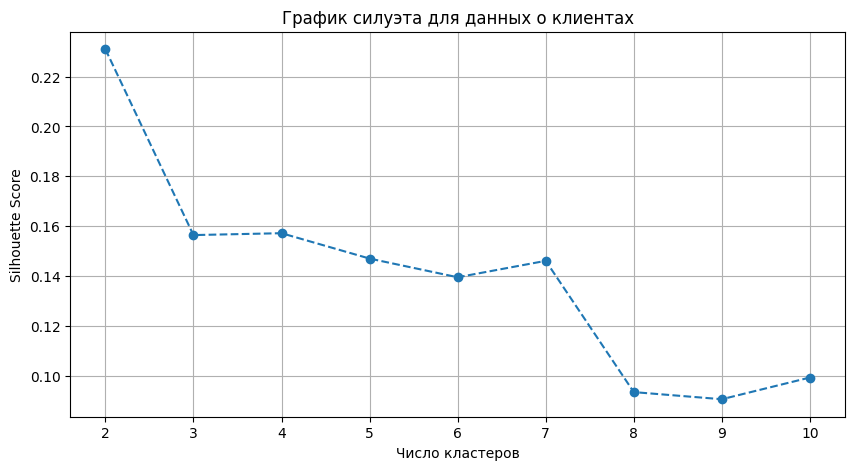

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Метод локтя
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cust)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Число кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя для данных о клиентах")
plt.grid()
plt.show()

# График силуэта
silhouette = []
for k in range(2, 11):
    clusters = KMeans(n_clusters=k, random_state=42).fit_predict(cust)
    silhouette.append(silhouette_score(cust, clusters))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o', linestyle='--')
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette Score")
plt.title("График силуэта для данных о клиентах")
plt.grid()
plt.show()

Возпользуйтесь методом KMeans для кластеризации.

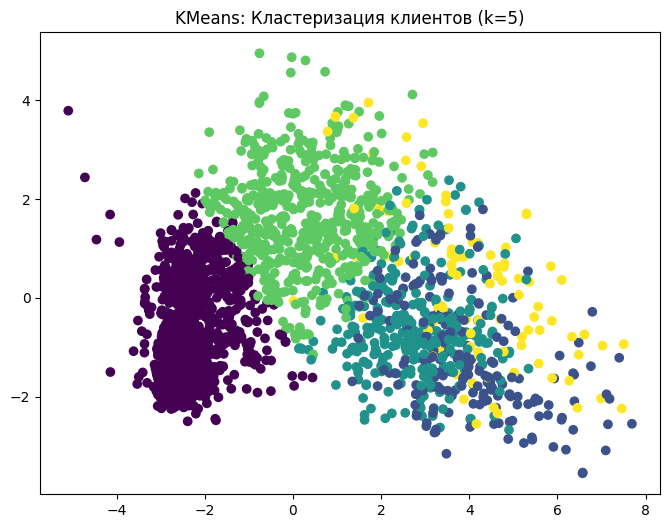

In [32]:
kmeans_cust = KMeans(n_clusters=5, random_state=42)
clusters_cust = kmeans_cust.fit_predict(cust)

# Визуализация через PCA
cust_pca = PCA(n_components=2).fit_transform(cust)
plt.figure(figsize=(8, 6))
plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters_cust, cmap='viridis')
plt.title("KMeans: Кластеризация клиентов (k=5)")
plt.show()

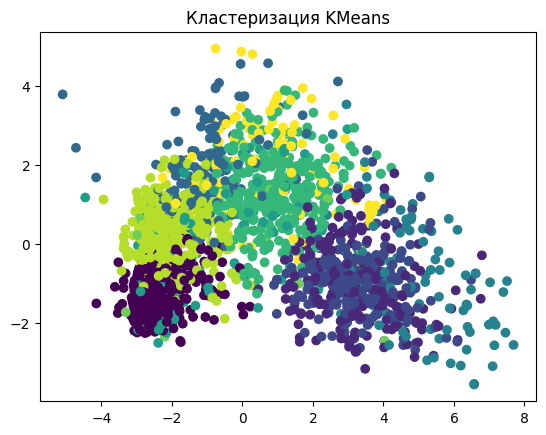

In [33]:
# Визуализация
plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Кластеризация KMeans")
plt.show()

## Иерархическая кластеризация

Агломеративный подход: каждая точка — отдельный кластер, затем объединяем ближайшие кластеры.

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

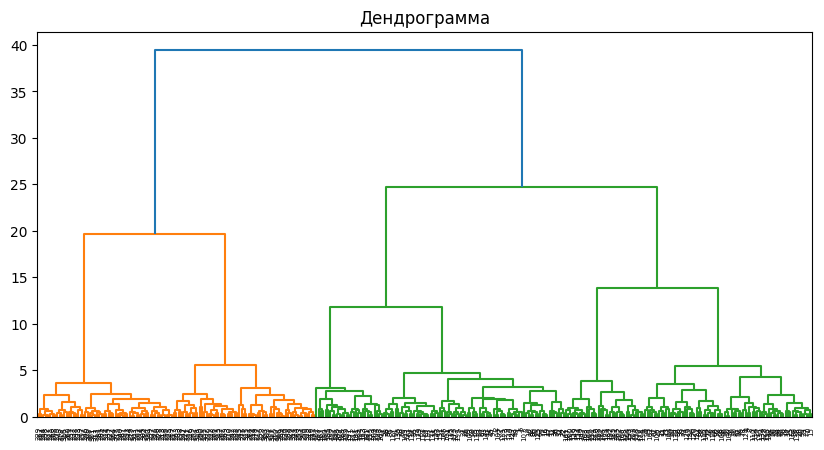

In [35]:
Z = linkage(peng, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Дендрограмма")
plt.show()

Дендрограмма показывает, как отдельные элементы объединяются в кластеры. В итоге получается один кластер - весь набор данных. Но, прерывая процесс объединения раньше, можно получить желаемое количество кластеров. Это и делает следующий метод.

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg.fit_predict(peng)

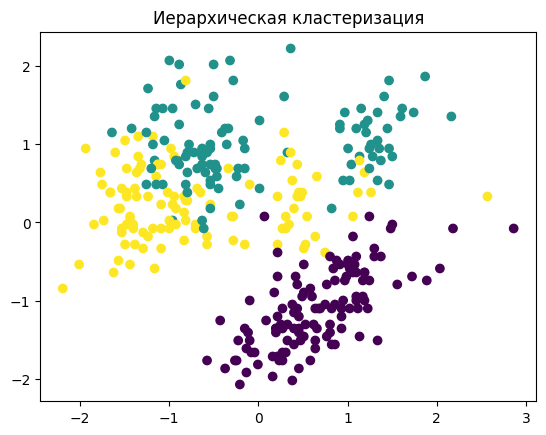

In [38]:
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters_agg, cmap='viridis')
plt.title("Иерархическая кластеризация")
plt.show()

Все ли хорошо с этой кластеризацией? Что можно исправить?

Теперь постройте дендрограмму для данных по клиентам.

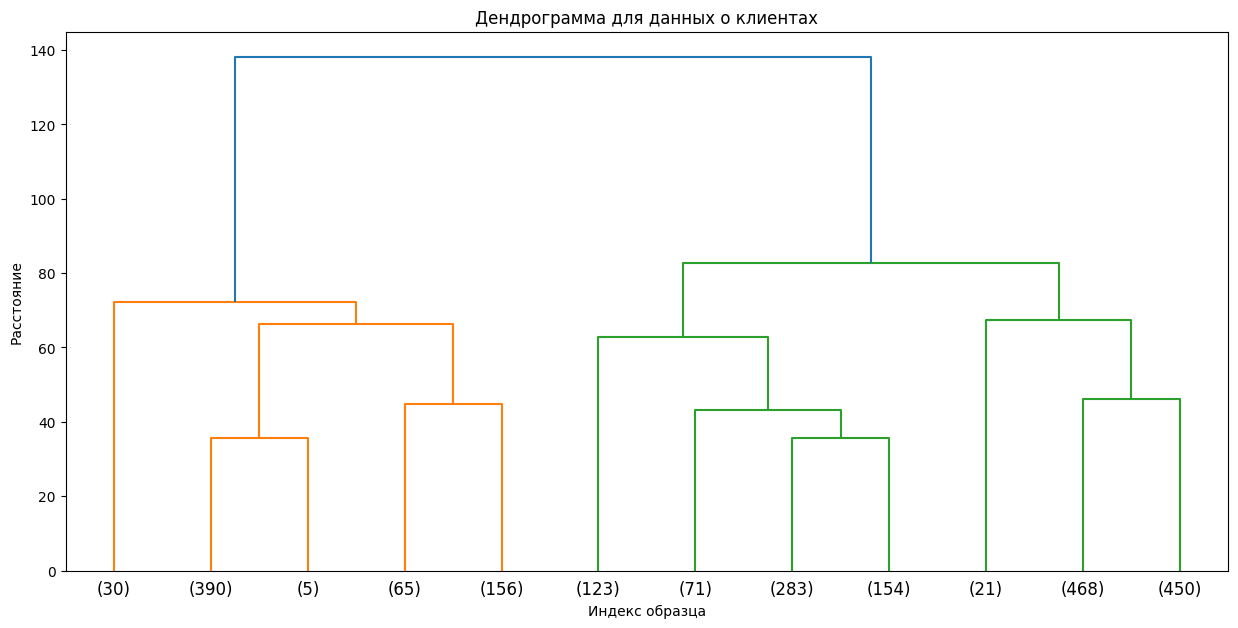

In [39]:
plt.figure(figsize=(15, 7))
Z = linkage(cust, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title("Дендрограмма для данных о клиентах")
plt.xlabel("Индекс образца")
plt.ylabel("Расстояние")
plt.show()

Какое количество кластеров будет хорошим вариантом? Можете оценить, как метод разделит данные при разном количестве кластеров.

In [40]:
agg = AgglomerativeClustering(n_clusters=6, linkage='ward')
clusters_agg = agg.fit_predict(cust)

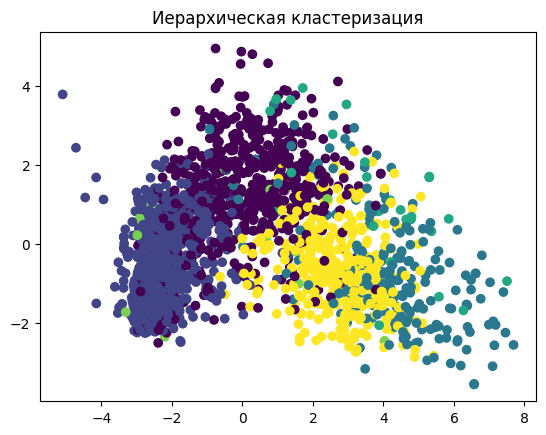

In [41]:
plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters_agg, cmap='viridis')
plt.title("Иерархическая кластеризация")
plt.show()

## DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [43]:
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

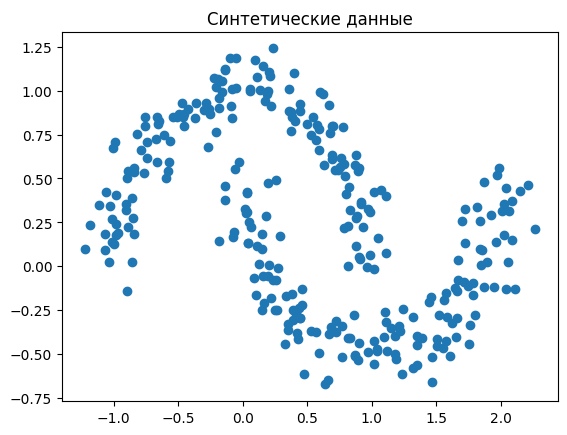

In [44]:
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("Синтетические данные")
plt.show()

In [45]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters_db = dbscan.fit_predict(X_moons)

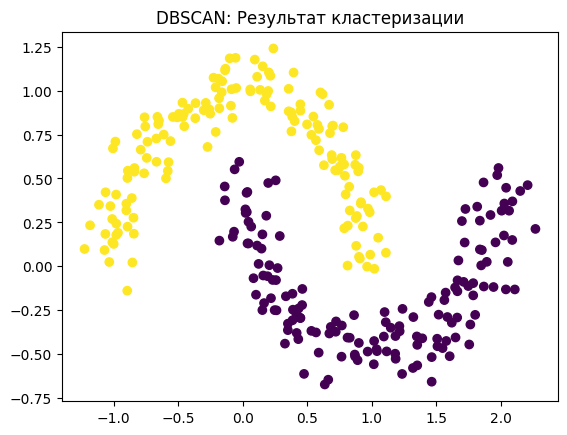

In [46]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_db, cmap='viridis')
plt.title("DBSCAN: Результат кластеризации")
plt.show()

Еще одно отличное применение этого метода - обнаружение шумов. Обратите внимание, как при снижении расстояния между соседями отстоящие чуть дальше точки могут отделяться от основных кластеров. Это как раз процесс выделения шумов.

In [47]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
clusters_db = dbscan.fit_predict(X_moons)

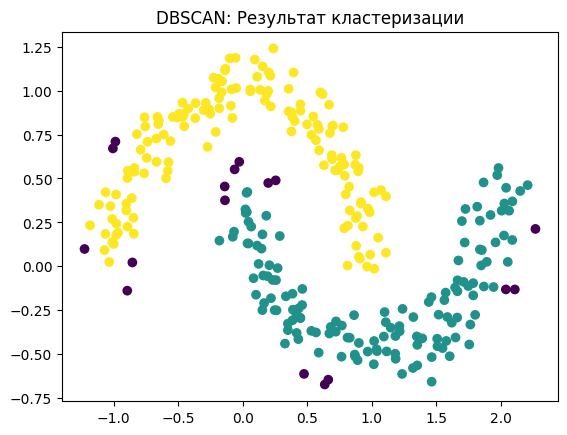

In [48]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_db, cmap='viridis')
plt.title("DBSCAN: Результат кластеризации")
plt.show()

А как с этими же данными справится KMeans?

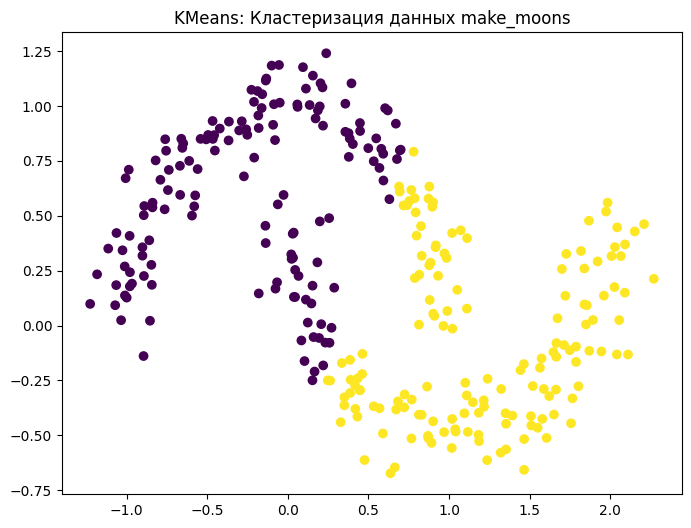

In [49]:
kmeans_moons = KMeans(n_clusters=2, random_state=42)
clusters_moons = kmeans_moons.fit_predict(X_moons)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_moons, cmap='viridis')
plt.title("KMeans: Кластеризация данных make_moons")
plt.show()

Посмотрим, как DBSCAN разделит данные по пингвинам, и возможноли получить на этих данных хорошее разделение.

In [50]:
dbscan = DBSCAN(eps=1, min_samples=5)
clusters_db = dbscan.fit_predict(peng.dropna())

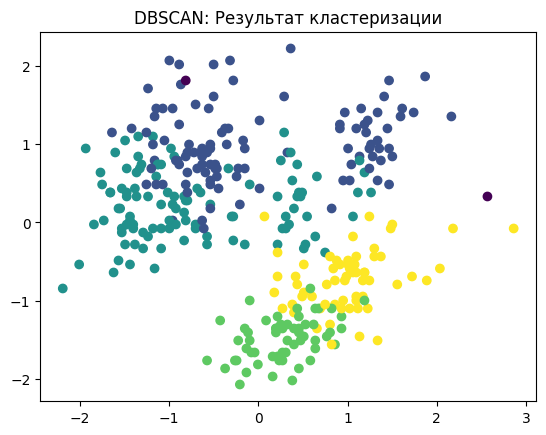

In [51]:
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters_db, cmap='viridis')
plt.title("DBSCAN: Результат кластеризации")
plt.show()

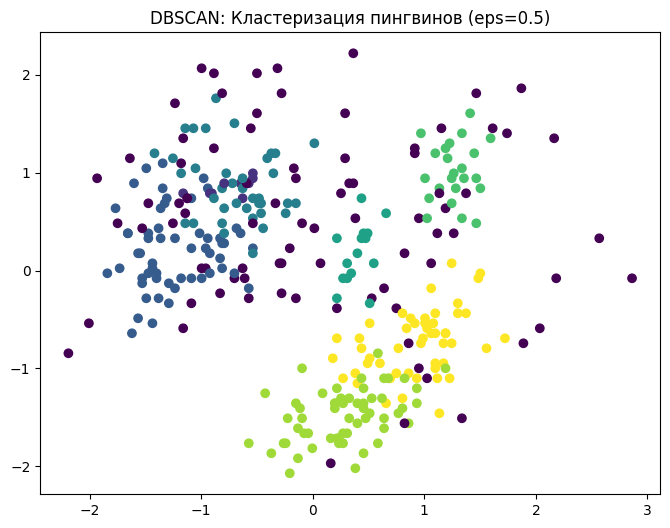

In [52]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_db_peng = dbscan.fit_predict(peng)

plt.figure(figsize=(8, 6))
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters_db_peng, cmap='viridis')
plt.title("DBSCAN: Кластеризация пингвинов (eps=0.5)")
plt.show()